In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
datos = pd.read_csv('/Users/ninoj/Downloads/articulos_ml.csv')


In [4]:
datos

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660


In [5]:
# 2. Descripción de los datos
print(datos.describe())

        Word count  # of Links  # of comments  # Images video  Elapsed days  \
count   161.000000  161.000000     129.000000      161.000000    161.000000   
mean   1808.260870    9.739130       8.782946        3.670807     98.124224   
std    1141.919385   47.271625      13.142822        3.418290    114.337535   
min     250.000000    0.000000       0.000000        1.000000      1.000000   
25%     990.000000    3.000000       2.000000        1.000000     31.000000   
50%    1674.000000    5.000000       6.000000        3.000000     62.000000   
75%    2369.000000    7.000000      12.000000        5.000000    124.000000   
max    8401.000000  600.000000     104.000000       22.000000   1002.000000   

            # Shares  
count     161.000000  
mean    27948.347826  
std     43408.006839  
min         0.000000  
25%      2800.000000  
50%     16458.000000  
75%     35691.000000  
max    350000.000000  


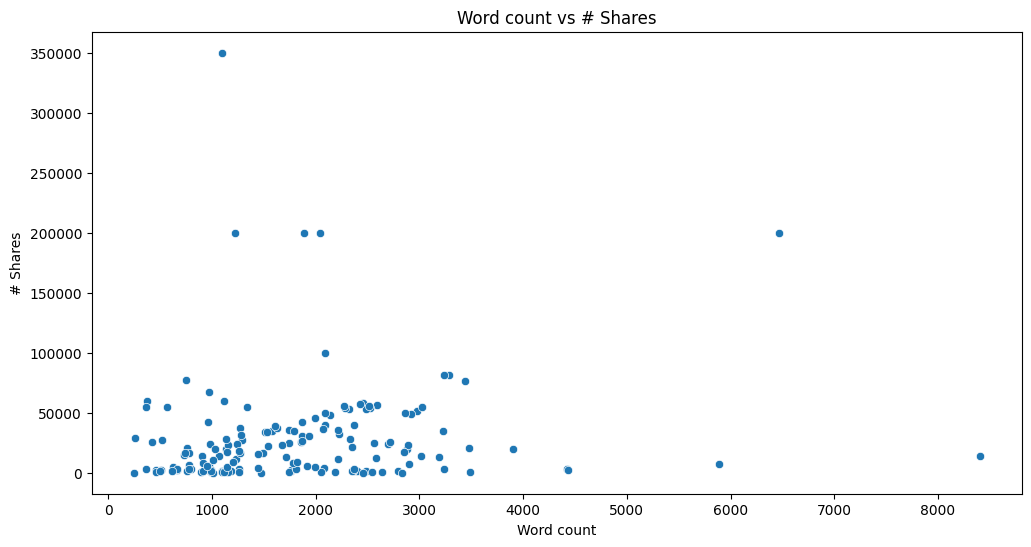

In [6]:
# 3. Visualización de la relación entre Word count y # Shares
plt.figure(figsize=(12, 6))
sns.scatterplot(x=datos['Word count'], y=datos['# Shares'])
plt.title('Word count vs # Shares')
plt.xlabel('Word count')
plt.ylabel('# Shares')
plt.show()

In [7]:
# 4. Selección de variables predictoras y variable objetivo
X = datos[['Word count', '# of Links', '# of comments', '# Images video', 'Elapsed days']].dropna()
y = datos['# Shares'].dropna()

In [8]:
# 5. Unir X e y en un solo DataFrame para eliminar filas con valores nulos
data = pd.concat([X, y], axis=1)
data_clean = data.dropna()
X_clean = data_clean.drop(columns=['# Shares'])
y_clean = data_clean['# Shares']

In [9]:
# 6. Escalado de las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

In [10]:
# 7. División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)

In [11]:
# 8. Definir el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)

In [12]:
# 9. Definir el espacio de hiperparámetros
param_dist_tree = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

In [13]:
# 10. Búsqueda aleatoria de hiperparámetros
random_search_tree = RandomizedSearchCV(
    tree_model, param_distributions=param_dist_tree, n_iter=20,
    scoring='neg_mean_squared_error', cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=42), random_state=42
)

In [14]:
# 11. Entrenar el modelo con los datos de entrenamiento
random_search_tree.fit(X_train, y_train)

C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constrain

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=42),
                   estimator=DecisionTreeRegressor(random_state=42), n_iter=20,
                   param_distributions={'max_depth': [3, 5, 10, 20, None],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='neg_mean_squared_error')

In [15]:
# 12. Mejor modelo encontrado
best_tree_model = random_search_tree.best_estimator_

In [16]:
# 13. Realizar las predicciones
y_pred_tree = best_tree_model.predict(X_test)

In [17]:
# 14. Evaluación del modelo
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
r2_tree = r2_score(y_test, y_pred_tree)

C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
print("\nÁrbol de Decisión (Regresión):")
print(f"Mejores parámetros: {random_search_tree.best_params_}")
print(f"Error cuadrático medio (MSE): {mse_tree}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse_tree}")
print(f"Coeficiente de determinación R^2: {r2_tree}")


Árbol de Decisión (Regresión):
Mejores parámetros: {'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 3}
Error cuadrático medio (MSE): 992806712.4278553
Raíz del error cuadrático medio (RMSE): 31508.835466069755
Coeficiente de determinación R^2: -1.1251461295134693


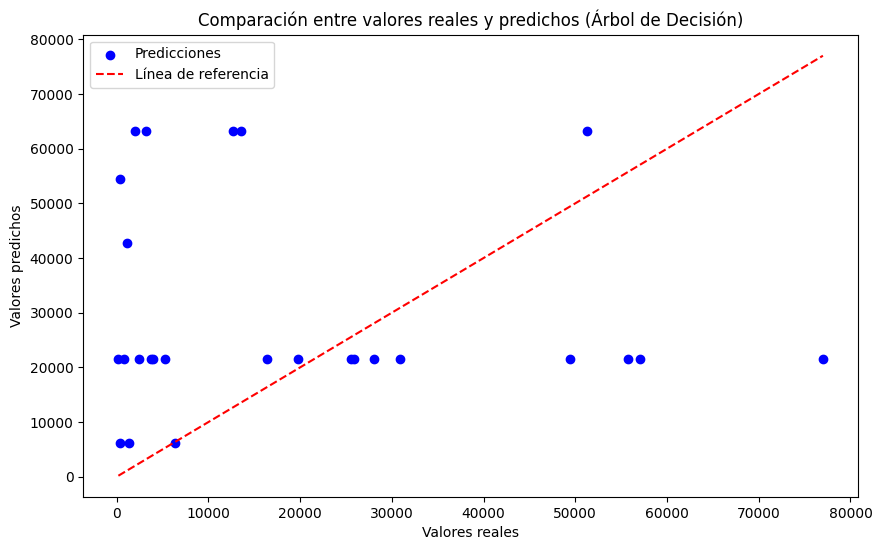

In [19]:
# 15. Visualización de los resultados: comparación entre valores reales y predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='blue', label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea de referencia')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Comparación entre valores reales y predichos (Árbol de Decisión)')
plt.legend()
plt.show()

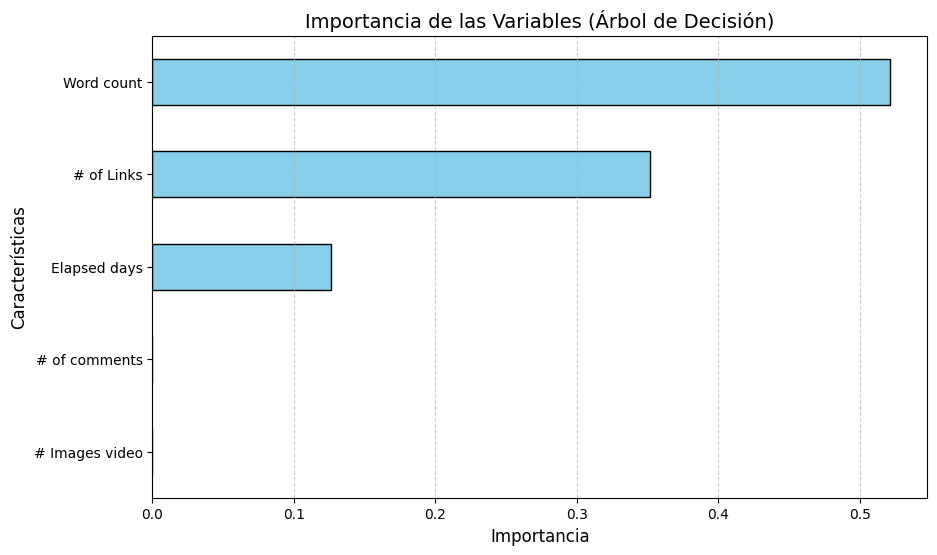

In [20]:


# Importancia de las características del modelo
feature_importances = pd.Series(best_tree_model.feature_importances_, index=['Word count', '# of Links', '# of comments', '# Images video', 'Elapsed days'])

# Crear la gráfica de importancia de características
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=True).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Importancia de las Variables (Árbol de Decisión)', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()